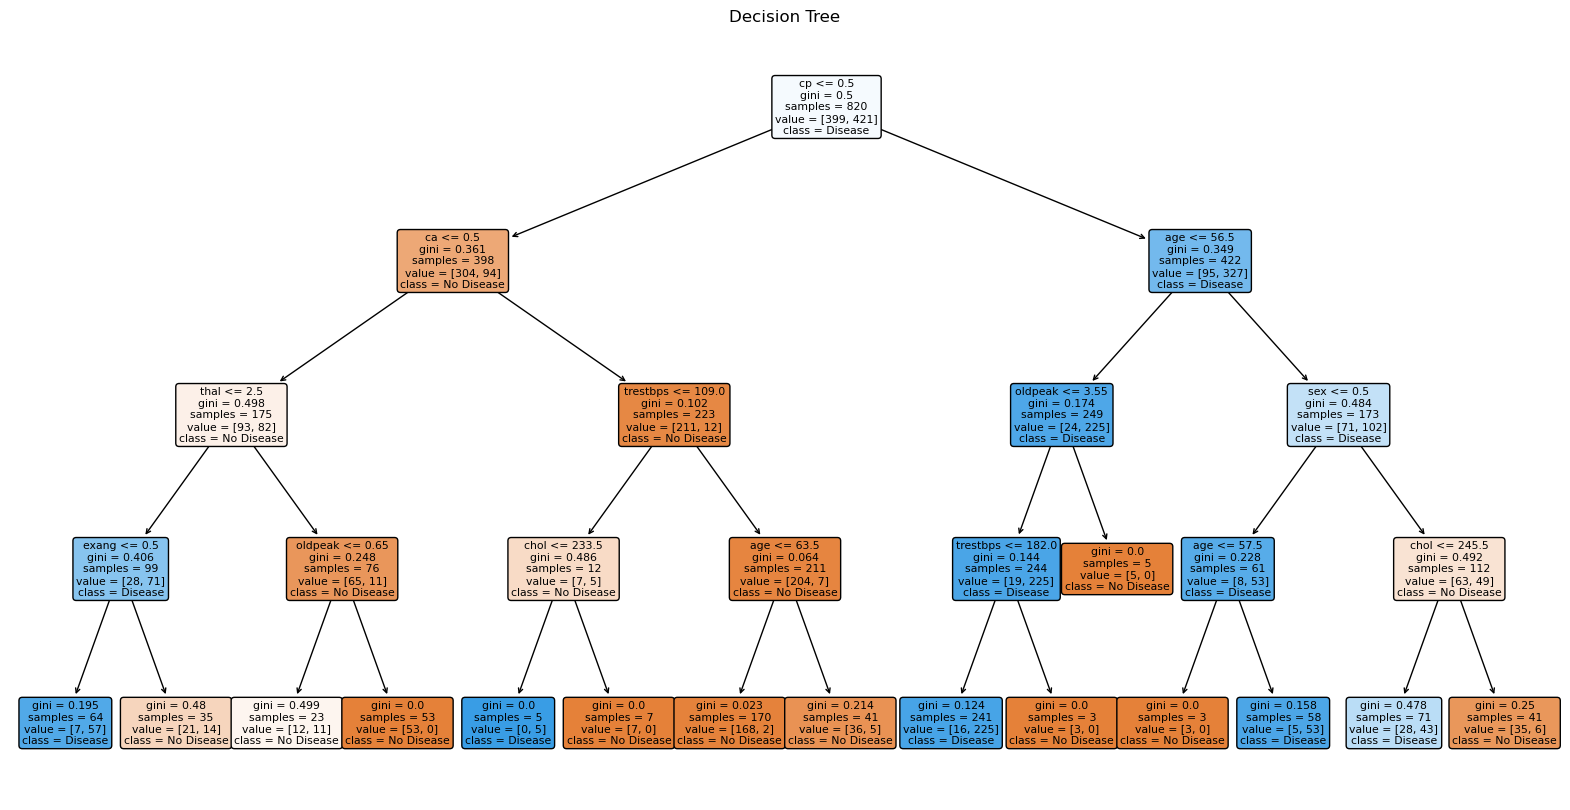

Decision Tree Accuracy: 0.8390243902439024
Random Forest Accuracy: 1.0

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



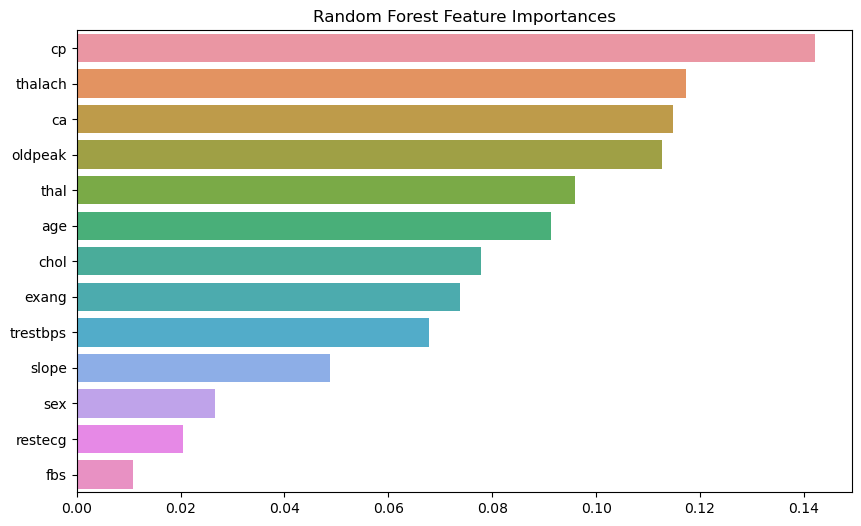

Random Forest 5-fold CV Accuracy: 0.997 +/- 0.006


In [1]:
# Task 5 - Decision Trees and Random Forests (Heart Disease Dataset)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# --- Load dataset (CSV file from Kaggle or local) ---
# Download from: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
df = pd.read_csv("heart.csv")

# --- Features and target ---
X = df.drop(columns='target')   # all columns except target
y = df['target']                # target column: 0 = No disease, 1 = Disease

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- Decision Tree Classifier ---
dt = DecisionTreeClassifier(random_state=42, max_depth=4)
dt.fit(X_train, y_train)

# --- Visualize the Decision Tree ---
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns,
          class_names=['No Disease', 'Disease'], rounded=True)
plt.title("Decision Tree")
plt.show()

# --- Random Forest Classifier ---
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# --- Predictions ---
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)

# --- Accuracy ---
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# --- Classification Report ---
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# --- Feature Importances from RF ---
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Random Forest Feature Importances')
plt.show()

# --- Cross-validation accuracy ---
cv_scores = cross_val_score(rf, X, y, cv=5)
print("Random Forest 5-fold CV Accuracy: %.3f +/- %.3f" % (cv_scores.mean(), cv_scores.std()))

